## Imports

In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Overview of Keras
The following are the common steps you want to take when fitting a neural network using keras:
1. Load data
2. Define keras model
3. Compile model
4. Fit model
5. Evaluate model
6. Use model for prediction

## References

- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition]( https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/ )


## Example 1 - Diabetes Prediction

### Load data

In [2]:
url = 'https://ddc-datascience.s3.amazonaws.com/pima-indians-diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diab_data = pd.read_csv( url, header = None, names = col_names)
diab_data.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diab_data.shape


(768, 9)

In [4]:
diab_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
diab_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Separate predictors and response
diab_predictors = diab_data.drop('label', axis = 1).copy()
diab_response = diab_data['label'].copy()


In [7]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(diab_predictors, diab_response, test_size=0.25, random_state=42)


In [8]:
X_train.shape


(576, 8)

In [9]:
# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [10]:
X_train.shape

(576, 8)

In [11]:
X_test.shape

(192, 8)

### Define keras model

Models in keras are produced using a sequence of layers. We sequentially add layers until we are happy with our model.

In [12]:
model = Sequential()

Define first hidden layer - need to specify input shape and activation function. We are using a Dense layer, which is a fully connected layer.

In [13]:
model.add(
  Dense(
    name = "Input",
    input_dim = 8,
    units = 8,
    activation = 'relu',
  )
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Define output layer

In [14]:
model.add(
  Dense(
    name = "Output",
    units = 1,
    activation = 'sigmoid',
  )
)

### Compile model

In [15]:
# Using binary cross entropy loss function and accuracy as metric since we are doing a binary prediction
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy']
)

### Fit model

In [16]:
# Fit model using training data
model.fit(X_train, y_train, epochs=12) ;

Epoch 1/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5205 - loss: 0.7296
Epoch 2/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.7146
Epoch 3/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6138 - loss: 0.6594
Epoch 4/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5810 - loss: 0.6766
Epoch 5/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6713 - loss: 0.6278
Epoch 6/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6590 - loss: 0.6291
Epoch 7/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6581 - loss: 0.6211 
Epoch 8/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.5906 
Epoch 9/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5687 
Epoch 10/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6932 - loss: 0.5749 
Epoch 11/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6966 - loss: 0.5681
Epoch 12/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6995 

In [17]:
model.metrics[1].metrics


[<BinaryAccuracy name=accuracy>]

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

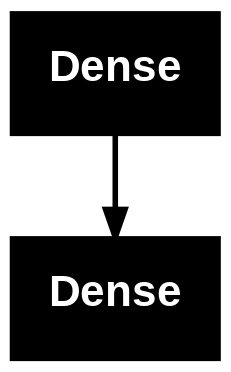

In [19]:
plot_model(model)

### Evaluate model

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6697 - loss: 0.5730  
0.6875


### Use model for prediction

In [21]:
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [22]:
predictions.shape

(192, 1)

In [23]:
predictions[1]

array([0.27165255], dtype=float32)

Create a threshold.

In [24]:
filter = ( predictions > 0.5 )
filter[:10]


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True]])

In [25]:
# Get class prediction by converting boolean to integers
class_pred = filter.astype("int32")
class_pred[1]

array([0], dtype=int32)

In [26]:
# Compare to true value
y_test.iloc[1]

0

In [27]:
predictions[:10]

array([[0.6173032 ],
       [0.27165255],
       [0.17680563],
       [0.23172595],
       [0.41649196],
       [0.65717655],
       [0.09548141],
       [0.12954877],
       [0.5118215 ],
       [0.53815633]], dtype=float32)

In [28]:
predictions.shape

(192, 1)

In [29]:
results = pd.DataFrame( {
  "Truth": y_test,
  "Prediction": predictions[:,0],
  "Class": class_pred[:,0],
} )

In [30]:
results.shape

(192, 3)

In [31]:
results.head()

,Truth,Prediction,Class
668,0,0.617303,1
324,0,0.271653,0
624,0,0.176806,0
690,0,0.231726,0
473,0,0.416492,0


First five mismatches.

In [32]:
results.query("Truth != Class").head()

,Truth,Prediction,Class
668,0,0.617303,1
204,0,0.657177,1
568,0,0.511822,1
148,0,0.538156,1
667,1,0.358621,0


Same first five mismatches using a filter.

In [33]:
filter_mismatch = ( results["Truth"] != results["Class"] )
results[filter_mismatch].head()

,Truth,Prediction,Class
668,0,0.617303,1
204,0,0.657177,1
568,0,0.511822,1
148,0,0.538156,1
667,1,0.358621,0


In [34]:
filter_mismatch.sum()

60

In [35]:
filter_mismatch.mean()

0.3125

## Example 2 - Number Recognition

### Load data

We will be looking at an example dataset from keras called MNIST.

In [36]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Automatically shuffles data into random training and testing sets

In [37]:
(
  type(x_train),
  type(y_train),
  type(x_test),
  type(y_test)
)


(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [38]:
(
  x_train.shape,
  y_train.shape,
  x_test.shape,
  y_test.shape
)


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [39]:
x_train.shape # 60,000 images that are 28 x 28 pixels

(60000, 28, 28)

In [40]:
# shape of a single image
x_train.shape[1:]

(28, 28)

The first image as a matrix of pixel intensities.

In [41]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

The 11th row of the first image.

In [42]:
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

The pixel intensity of the 9th column of the 11th row of the first image.


In [43]:
x_train[0][10][9]

14

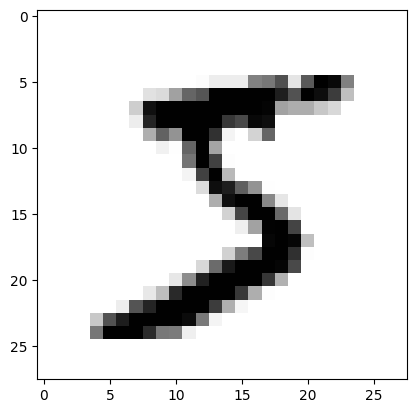

In [44]:
# Visualize one of the training samples
plt.imshow( x_train[0], cmap = plt.cm.gray_r )
plt.show()

In [45]:
# See the response for that sample
y_train[0]

5

### Define keras model

First, we will normalize our data values to fall between 0 and 1.

In [46]:
# View before normalization
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [47]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [48]:
# View after normalization
x_train[0][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0253731 ,
       0.00171577, 0.22713296, 0.33153488, 0.11664776, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

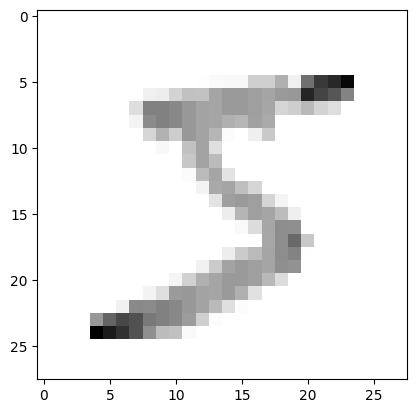

In [49]:
plt.imshow(x_train[0],cmap=plt.cm.gray_r)
plt.show()

Start the model as a feed forward (sequential) model.

In [50]:
model = Sequential()

# Flatten input data into a 1D structure
model.add(Flatten())

# Define first hidden layers
model.add(
  Dense(
    name = "hidden1",
    units = 144,
    activation = 'relu' ,
  )
)

# Add second hidden layer
model.add(
  Dense(
    name = "hidden2",
    units = 144,
    activation = 'relu' ,
  )
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 10,
    activation = 'softmax' ,
  )
)

### Compile model

In [51]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

### Fit model

In [52]:
model.fit(x_train, y_train, epochs=8) ;

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8715 - loss: 0.4507
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9692 - loss: 0.1027
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9792 - loss: 0.0649
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9846 - loss: 0.0466
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0342
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9919 - loss: 0.0249
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0201
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0160


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (32, 144)                   │         113,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (32, 144)                   │          20,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (32, 10)                    │           1,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,112 (1.55 MB)

 Trainable params: 135,370 (528.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 270,742 (1.03 MB)

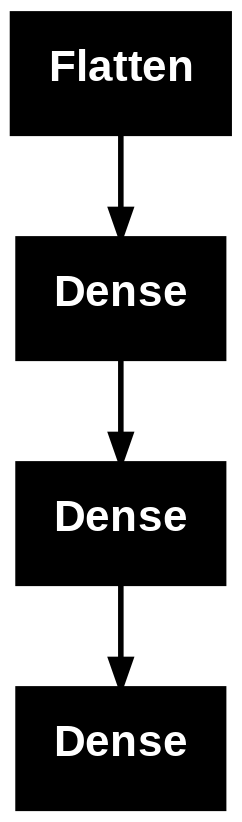

In [54]:
plot_model(model)

### Evaluate model

In [55]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1388


0.9710000157356262

### Use model for prediction

In [56]:
predictions = model.predict(x_test)
print(predictions[257])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.7470512e-08 1.0311448e-04 1.8873905e-06 1.0133544e-04 9.2266174e-07
 8.6990993e-05 2.2471705e-04 7.0486109e-08 9.9948096e-01 1.8928132e-09]


In [57]:
[ print(f"{k}: {x:.2f}") for k, x in enumerate(predictions[257]*100) ]


0: 0.00
1: 0.01
2: 0.00
3: 0.01
4: 0.00
5: 0.01
6: 0.02
7: 0.00
8: 99.95
9: 0.00


[None, None, None, None, None, None, None, None, None, None]

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
predictions.shape

(10000, 10)

In [60]:
print(np.argmax(predictions[257]))

8


In [61]:
y_test[257]

8

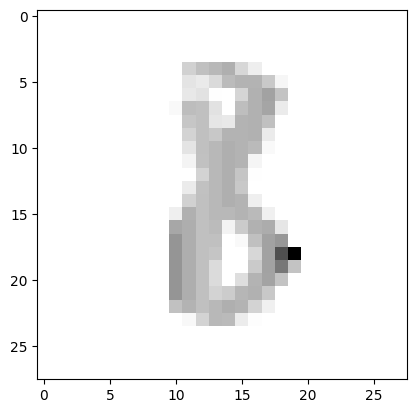

In [62]:
plt.imshow(x_test[257], cmap=plt.cm.gray_r)
plt.show()

### Fitting a convolutional neural network
[Max pooling example](https://deeplizard.com/learn/video/ZjM_XQa5s6s)

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
x_train[0][10][9]

0.025373104769234954

In [65]:
# Reshape data to be 4 dimensional
# long method: x_train2 = x_train.reshape( x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train2 = x_train.reshape( x_train.shape + (1,) )
x_train2.shape

(60000, 28, 28, 1)

In [66]:
# shape of a single image
x_train2.shape[1:]

(28, 28, 1)

In [67]:
# notice vector instead of scalar
x_train2[0][10][9]

array([0.0253731])

In [68]:
model = Sequential()


In [69]:
# Define input layer & first hidden layer
model.add(
  Conv2D(
    name = "input",
    input_shape = x_train2.shape[1:],
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "hidden1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)


In [71]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 10,
    activation = 'softmax',
  )
)


In [72]:
# Compile model
model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'],
)


In [73]:
# Fit model
model.fit(x_train2, y_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8883 - loss: 0.3841
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0681
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0428
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0316
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9922 - loss: 0.0236
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0200
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0158
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9963 - loss: 0.0118


In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Conv2D)                       │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Conv2D)                     │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,736 (627.88 KB)

 Trainable params: 53,578 (209.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,158 (418.59 KB)

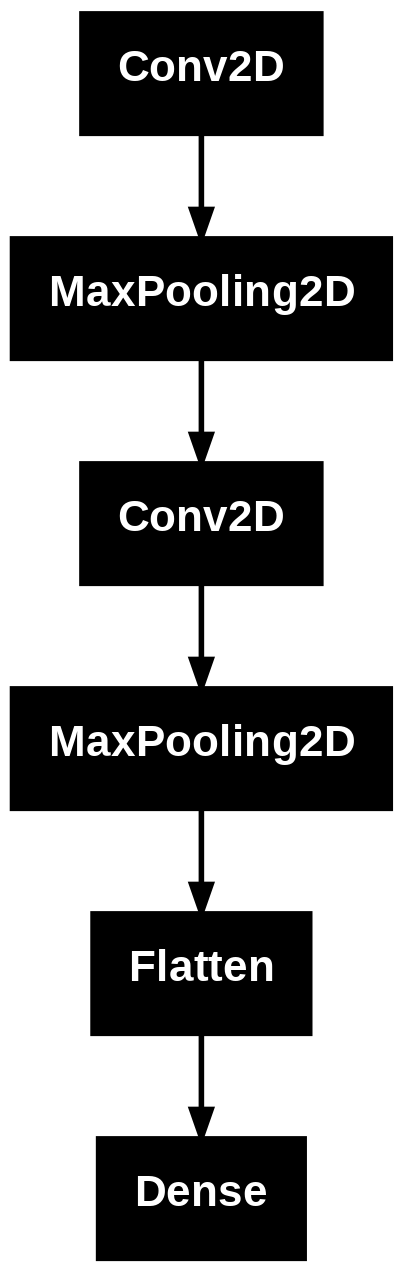

In [75]:
plot_model(model)

In [76]:
# Change test set to 4-D
x_test2 = x_test.reshape( x_test.shape + (1,) )

# Evaluate model
val_loss, val_acc = model.evaluate(x_test2, y_test)
print(val_loss)
print(val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9862 - loss: 0.0466
0.036060526967048645
0.9889000058174133


In [77]:
# make predictions based on testing set
predictions = model.predict(x_test2)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [78]:
predictions.shape

(10000, 10)

0: 0.00
1: 0.00
2: 0.23
3: 0.72
4: 0.00
5: 0.00
6: 0.24
7: 0.00
8: 98.81
9: 0.00
8
8


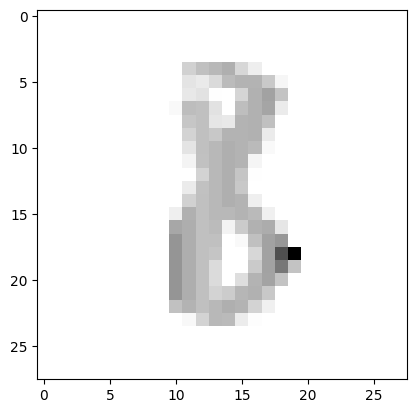

In [79]:
# pick any image from 0 to 10k-1
i = 257

for k, x in enumerate(predictions[i]*100):
  print(f"{k}: {x:.2f}")
print(np.argmax(predictions[i]))
print(y_test[i])
plt.imshow(x_test[i], cmap=plt.cm.gray_r)
plt.show()